In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os
if os.name == "posix":
    plt.rc("font", family="AppleGothic")
plt.rc("axes", unicode_minus=False)
%config InlineBackend.figure_format = 'retina'

In [10]:
df = pd.read_csv("data/heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


<AxesSubplot:>

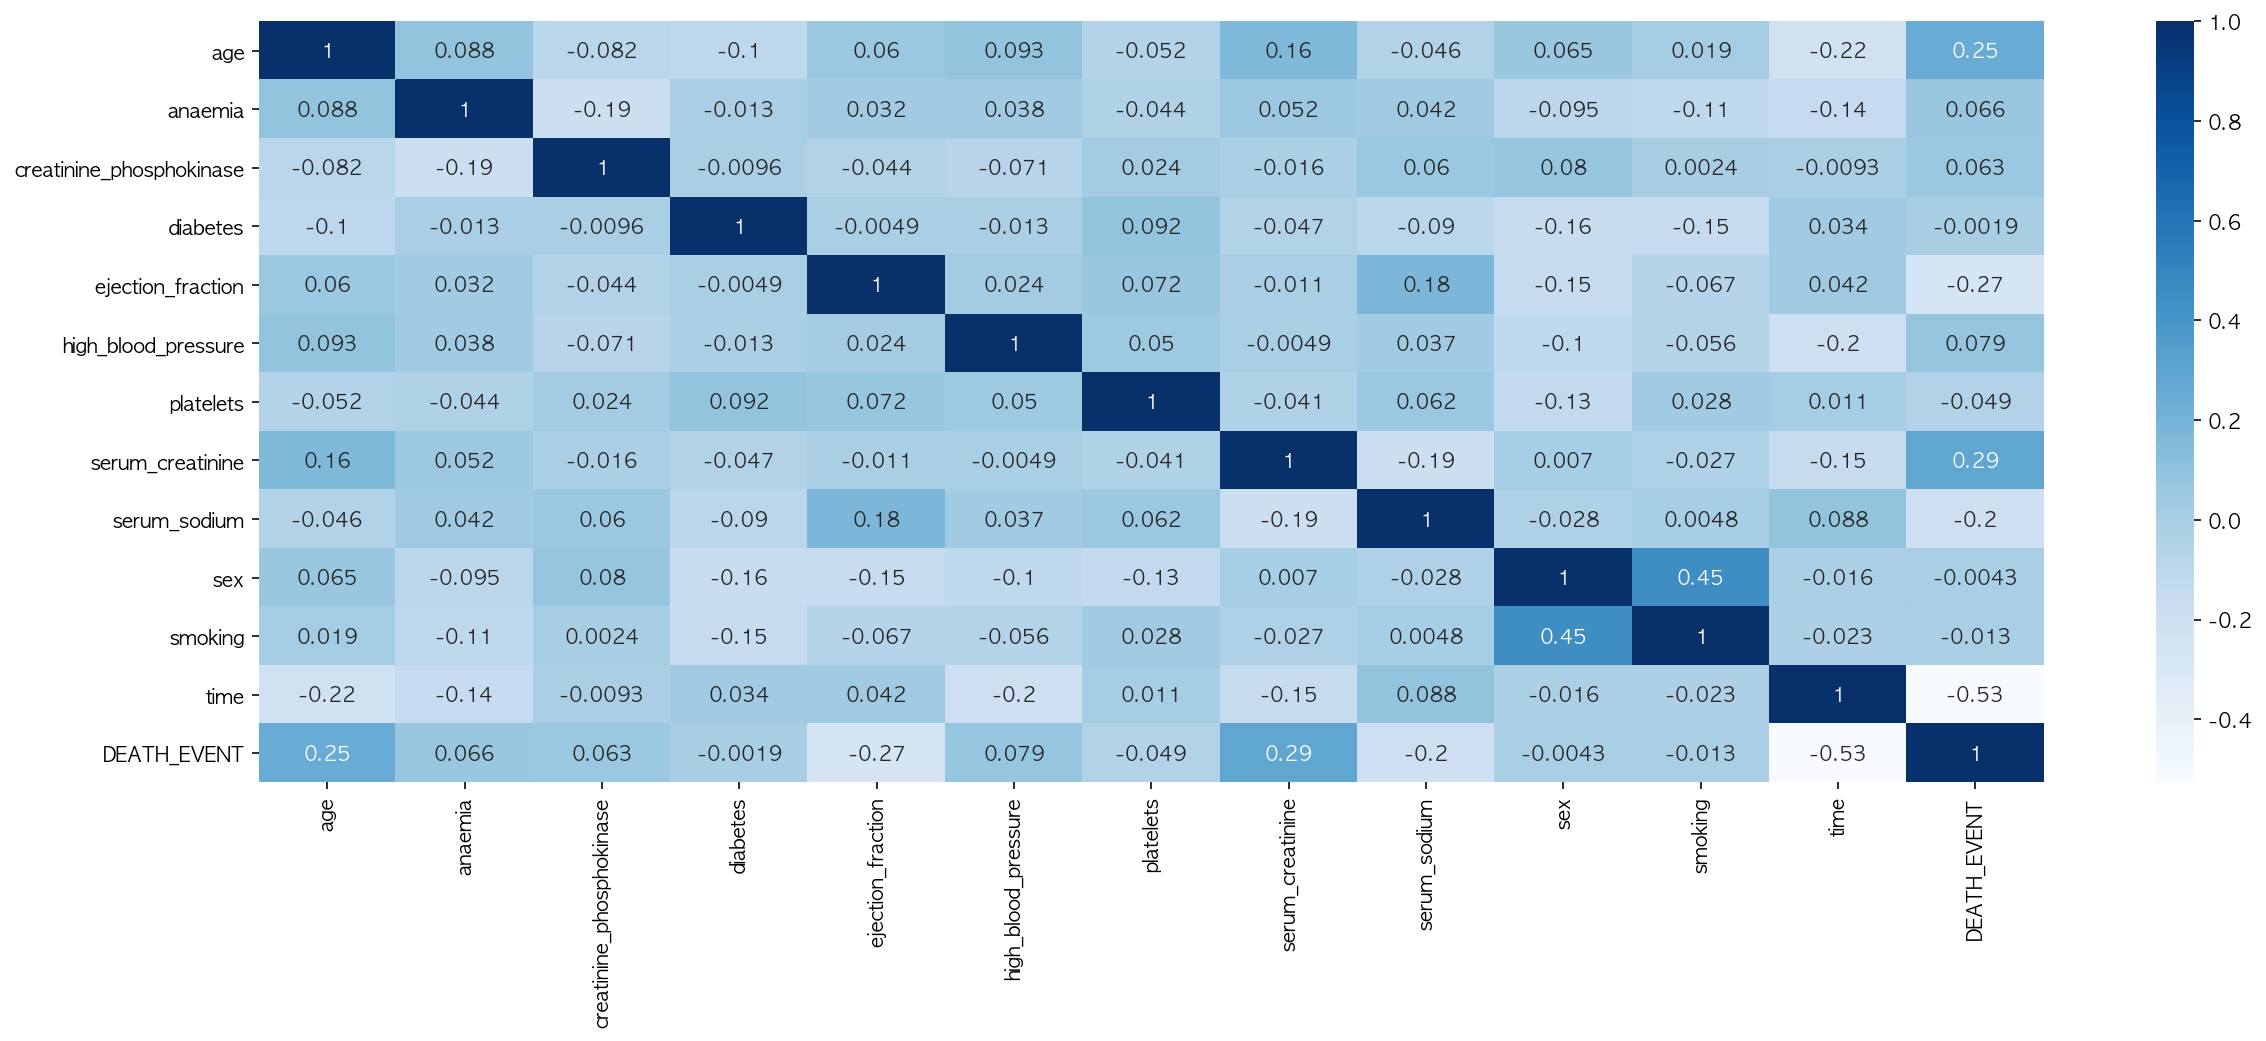

In [15]:
plt.figure(figsize= (20,7))
df_corr = df.corr()
sns.heatmap(df_corr, annot=True, cmap="Blues")

<AxesSubplot:xlabel='serum_creatinine', ylabel='age'>

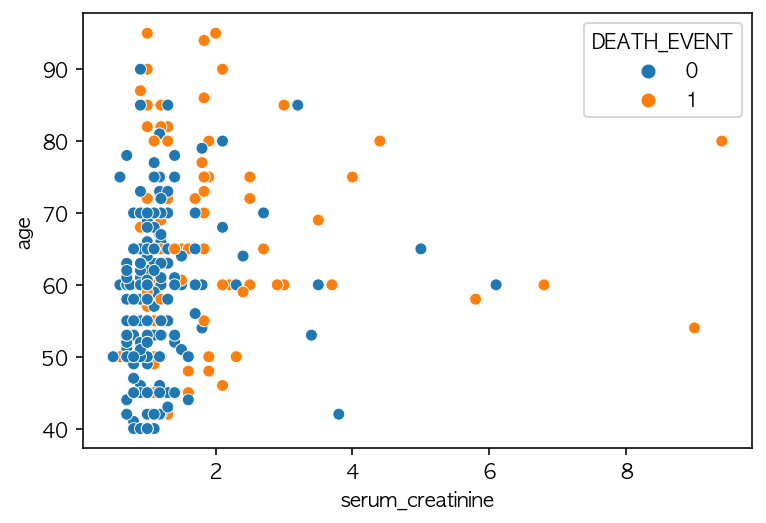

In [71]:
sns.scatterplot(data = df, x = "serum_creatinine", y = "age", hue ="DEATH_EVENT")

In [72]:
split_count = int(df.shape[0] * 0.8)
split_count

239

In [73]:
train = df[:split_count].copy()
train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,53.0,1,582,0,45,0,305000.00,1.1,137,1,1,209,0
235,77.0,1,109,0,50,1,406000.00,1.1,137,1,0,209,0
236,75.0,0,119,0,50,1,248000.00,1.1,148,1,0,209,0
237,70.0,0,232,0,30,0,173000.00,1.2,132,1,0,210,0


In [74]:
test = df[split_count:].copy()
test

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
239,55.0,1,180,0,45,0,263358.03,1.18,137,1,1,211,0
240,70.0,0,81,1,35,1,533000.00,1.30,139,0,0,212,0
241,65.0,0,582,1,30,0,249000.00,1.30,136,1,1,212,0
242,40.0,0,90,0,35,0,255000.00,1.10,136,1,1,212,0
243,73.0,1,1185,0,40,1,220000.00,0.90,141,0,0,213,0
244,54.0,0,582,1,38,0,264000.00,1.80,134,1,0,213,0
245,61.0,1,80,1,38,0,282000.00,1.40,137,1,0,213,0
246,55.0,0,2017,0,25,0,314000.00,1.10,138,1,0,214,1
247,64.0,0,143,0,25,0,246000.00,2.40,135,1,0,214,0
248,40.0,0,624,0,35,0,301000.00,1.00,142,1,1,214,0


In [75]:
feature_names = train.columns[:-1].tolist()
feature_names

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time']

In [76]:
label_name = train.columns[-1]
label_name

'DEATH_EVENT'

In [77]:
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(239, 12)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [78]:
y_train = train[label_name]
print(y_train.shape)
y_train.head()

(239,)


0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

In [79]:
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(60, 12)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
239,55.0,1,180,0,45,0,263358.03,1.18,137,1,1,211
240,70.0,0,81,1,35,1,533000.00,1.30,139,0,0,212
241,65.0,0,582,1,30,0,249000.00,1.30,136,1,1,212
242,40.0,0,90,0,35,0,255000.00,1.10,136,1,1,212
243,73.0,1,1185,0,40,1,220000.00,0.90,141,0,0,213


In [80]:
y_test = test[label_name]
print(y_test.shape)
y_test.head()

(60,)


239    0
240    0
241    0
242    0
243    0
Name: DEATH_EVENT, dtype: int64

In [81]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [ ]:
model.fit(X_train, y_train)